In [1]:
import random

In [12]:
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return 'thin'
    if bmi < 25: return 'normal'
    return 'fat'
fp = open('bmi.csv','w',encoding='utf-8')
fp.write('height,weight,label\r\n')
cnt = { 'thin':0, 'normal':0, 'fat':0 }
for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35,80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write(f"{h},{w},{label}\r\n")
fp.close()
print('ok', cnt)

ok {'thin': 6324, 'normal': 5933, 'fat': 7743}


In [13]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
tbl = pd.read_csv('bmi.csv')
tbl.head()

,height,weight,label
0,122,76,fat
1,196,77,normal
2,171,35,thin
3,135,46,fat
4,122,78,fat


In [15]:
label = tbl['label']
w = tbl['weight'] / 100
h = tbl['height'] / 200
wh = pd.concat([w, h], axis=1)
wh.head()

,weight,height
0,0.76,0.610
1,0.77,0.980
2,0.35,0.855
3,0.46,0.675
4,0.78,0.610


In [16]:
data_train, data_test, label_train, label_test = train_test_split(wh, label)

In [17]:
clf = svm.SVC()
clf.fit(data_train, label_train)
predict = clf.predict(data_test)

In [20]:
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
ac_score

0.9974

In [22]:
 print(cl_report)

              precision    recall  f1-score   support

         fat       1.00      1.00      1.00      1917
      normal       0.99      1.00      1.00      1497
        thin       1.00      0.99      1.00      1586

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



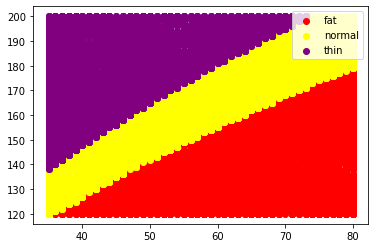

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
tbl = pd.read_csv('bmi.csv', index_col=2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b['weight'],b['height'], c=color,label=lbl)
scatter('fat', 'red')
scatter('normal', 'yellow')
scatter('thin', 'purple')
ax.legend()
plt.show()

In [32]:
tbl = pd.read_csv('bmi.csv')
label = tbl['label']
w = tbl['weight'] / 100
h = tbl['height'] / 200
wh = pd.concat([w, h], axis=1)
data_train, data_test, label_train, label_test = train_test_split(wh, label)
clf = svm.LinearSVC()
clf.fit(data_train, label_train)
predict = clf.predict(data_test)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)

In [33]:
ac_score

0.917

In [34]:
print(cl_report)

              precision    recall  f1-score   support

         fat       0.90      1.00      0.95      1941
      normal       1.00      0.72      0.84      1495
        thin       0.89      1.00      0.94      1564

    accuracy                           0.92      5000
   macro avg       0.93      0.91      0.91      5000
weighted avg       0.93      0.92      0.91      5000

